# 2.2.1 Definición de probabilidad y sus aplicaciones: Algoritmo 1R

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings("ignore")

Las técnicas de clasificación son utilizadas para resolver problemas en los cuales se debe determinar a cuál clase pertenece una instancia a partir de los valores de sus atributos; entre los casos prácticos de aplicación se encuentran: el diagnóstico de enfermedades (el paciente tiene o no la enfermedad), la detección de fraudes, los sistemas de reconocimiento (el objeto es o no es una persona), el riesgo crediticio (el solicitante pagará o no pagará la deuda). En este tutorial se presenta el algoritmo 1R, el cual permite construir un clasificador de referencia basado en reglas de asociación, y contra el cual se pueden contrastar los resultados de otros algoritmos más complejos.

## Descripción del problema

El problema abordado se desea determina a que clase pertenece una nueva observación (A, B o C), con base en una muestra de observaciones recolectada previamente.

Se tiene un conjunto ficticio de 15 ejemplos para los cuales se tienen tres características x1, x2 y x3 y su respectiva clase. Se desea determinar a qué clase pertenece un nuevo punto con coordenadas x1, x2 y x3. Si las clases representan la presencia (o no) de una enfermedad, las variables xi podrían representan, por ejemplo, los resultados de los exámenes médicos de los pacientes.

In [ ]:
data_list = [("a","e","h","A"),
             ("a","e","i","C"),
             ("a","e","j","B"),
             ("a","f","h","A"),
             ("a","f","i","A"),
             ("a","g","h","A"),
             ("a","g","h","B"),
             ("b","e","i","B"),
             ("b","f","i","B"),
             ("b","f","j","B"),
             ("b","g","j","C"),
             ("c","e","i","C"),
             ("c","f","j","C"),
             ("c","g","h","B"),
             ("c","g","i","B"),
             ("c","g","j","C"),
             ("d","f","j","A"),
             ("d","g","j","A")
            ]
list_name = ["x1","x2","x3","y"]
df = pd.DataFrame(data_list, columns=list_name)
df.head()

## Definición de probabilidad como frecuencia

- Espacio muestral: se define como el conjunto de todos los posibles resultados de un experimento.

- Pregunta. En la tirada de dos dados, ¿cuál es el espacio muestral?

- Evento: Es cualquier colección de posibles resultados de un experimento (subconjunto del espacio muestral).

En su forma más simple, el concepto de probabilidad puede interpretarse como la frecuencia con que ocurre un evento. Por ejemplo, si en la tirada de dos dados se definen como un evento la cantidad de posibles resultados que dan una suma determinada, entonces:

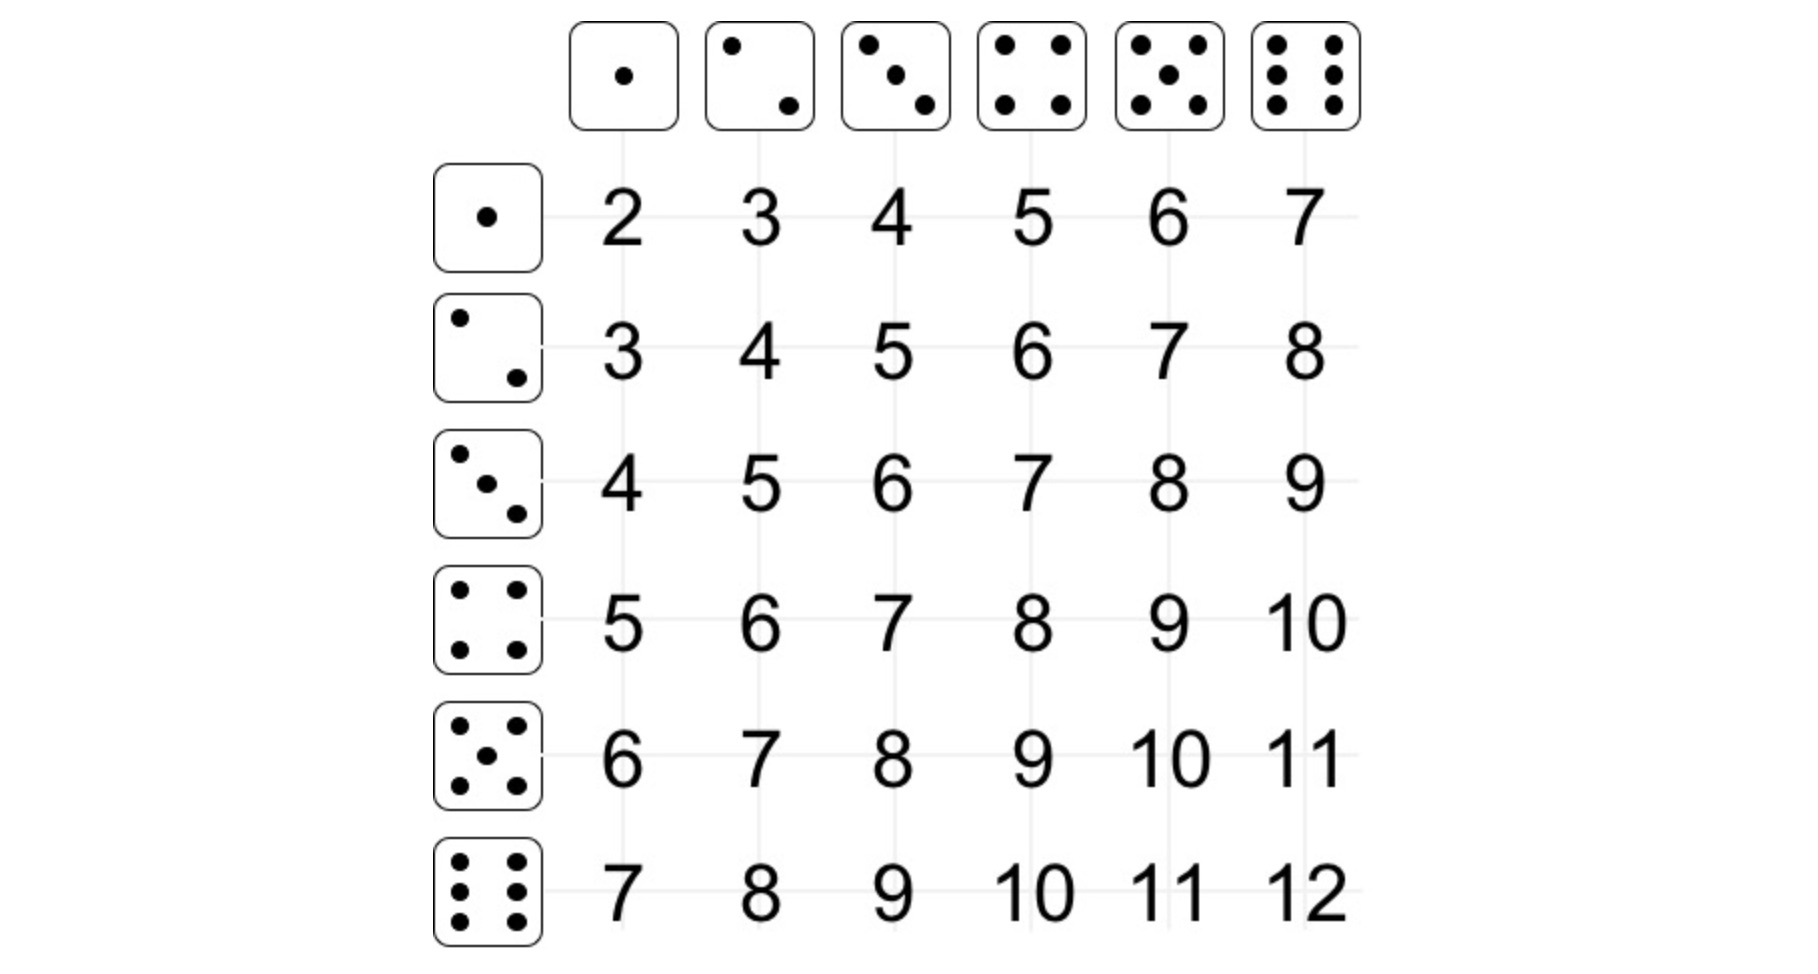

Pr(𝑋= 2) = 1 / 36   
Pr(𝑋= 3) = 2 / 36   
Pr(𝑋= 4) = 3 / 36   
Pr(𝑋= 5) = 4 / 36   
Pr(𝑋= 6) = 5 / 36   
Pr(𝑋= 7) = 6 / 36   
Pr(𝑋= 8) = 5 / 36   
Pr(𝑋= 9) = 4 / 36   
Pr(𝑋=10) = 3 / 36   
Pr(𝑋=11) = 2 / 36   
Pr(𝑋=12) = 1 / 36    

## Propiedades y definiciones básicas sobre probabilidad

- Todas las probabilidades deben estar entre 0 y 1:

$$ 0≤Pr(x_i)≤1 $$ 

- Las probabilidades de eventos mutuamente exclusivos (no pueden ocurrir simultáneamente) y colectivamente exhaustivos (cubren todo el universo de casos posibles) deben sumar la unidad:

$$ \sum_{i=1}^{n}Pr(x_i)=1 $$

- En las siguientes figuras, los eventos F1, F2 y F3, y V1 y V2 están definidos sobre el mismo universo; y son mutuamente exclusivos y colectivamente exhaustivos, tal que se cumplen las dos propiedades anteriores

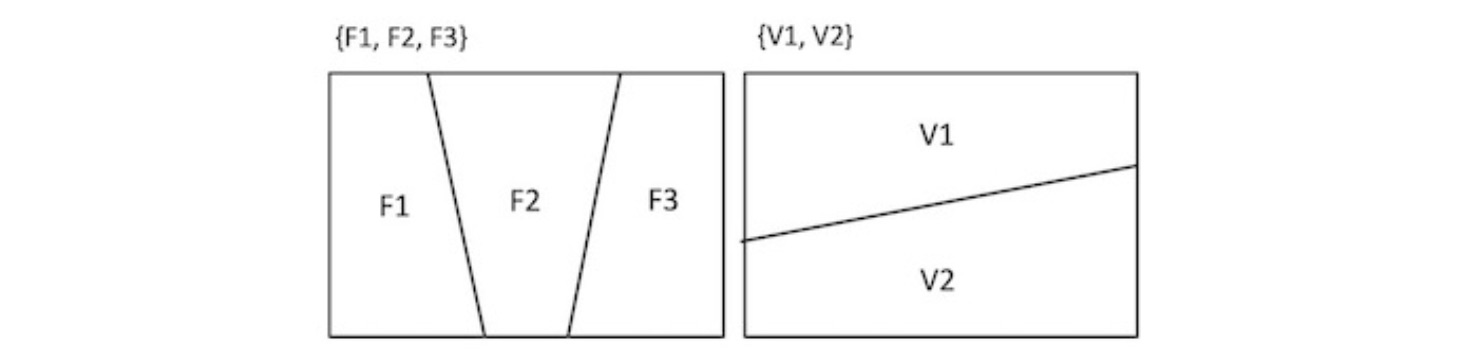

$$ Pr(F1)+Pr(F2)+Pr(F3)=1, Pr(V1)+Pr(V2)=1$$

- Probabilidad condicional Pr(A|B): probabilidad de que ocurra un evento A sabiendo que otro evento B ya ocurrió.

- Independencia: Si los eventos A y B son independientes:

$$ Pr(A|B) = Pr(A) $$

## Reglas de asociación para clasificación

La metodología 1R se basa en la partición del espacio de entrada usando una y sólo una de las variables (atributos) del problema. Para el problema planteado, una regla basada en el atributo x1 podría ser:

if x1 in {a, d}:  y = A
if x1 in {b}:     y = B
if x1 in {c}:     y = C

El algoritmo funciona de la siguiente forma: se toma el primer atributo x1 y se divide en grupos por cada valor que puede tomar dicho atributo, es decir, por a, b, c, y d; para cada atributo se determina a que clase es más probable que pertenezca los ejemplos y se asigna dicha clase a dicho atributo. Es decir, para cada atributo se cuentan cuántos ejemplos hay de cada categoría y se asigna la clase por mayoría, esto es, si hay cuatro ejemplos para la categoría a de x1 y tres de ellos pertenecen a la clase A y el restante a C se dice que if x1 == a: y = A; esto equivale a decir que si x1 == a es más probable que el ejemplo pertenezca a la clase sea A. Así, el clasificador basado en este atributo podría ser escrito como un sistema de reglas:

     #   x1   x2   x3    y
--------------------------

if x1 == a:  y = A

     1    a    g    h    A
     2    a    e    i    A
     3    a    f    h    A
    11    a    e    i    C

if x1 == b:  y = B

     6    b    e    i    B
     7    b    f    i    B
    12    b    g    j    C
     8    b    f    i    B

if x1 == c:  y = C

     9    c    g    h    B
    10    c    g    h    B
    13    c    f    j    C
    14    c    g    h    C
    15    c    e    i    C

if x1 == d:  y = A

     4    d    f    j    A
     5    d    g    j    A

Al agrupar por x1, este conjunto de reglas se reescribe como:

if x1 in {a, d}:

    y = A

elif x1 in {b}:

    y = B
    
else:

    y = C
 

Para el clasificador anterior se puede calcular una métrica de error.

Luego se toma el segundo atributo $x_2$ y se procede de igual forma para construir otro clasificador. El proceso se repite hasta obtener un clasificador por cada atributo. Se escoge el clasificador con mayor precisión.

## Métricas de desempeño de clasificadores

Para evaluar el desempeño en problemas de clasificación dicotómicos (dos clases mutuamente excluyentes) se usa la matriz de confusión:

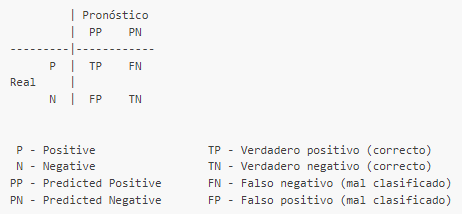

Esta tabla permite analizar el comportamiento del modelo.

La medición de la precisión del modelo permite estimar el desempeño del modelo ante nuevos datos.

- Tasa de éxito (porcentaje de patrones clasificados correctamente):

$$ success \ rate=\frac{TP+TN}{TP+TN+FP+FN} $$

- Tasa de error (porcentaje total de patrones clasificados incorrectamente):

$$ error \ rate=\frac{FP+FN}{TP+TN+FP+FN}=1−accuracy $$

- Precisión o valor predictivo positivo: Proporción de casos positivos que fueron verdaderamente positivos.

$$ precision=\frac{TP}{TP+FP} $$

- Valor predictivo negativo: Proporción de casos negativos que fueron verdaderamente negativos.

$$ negative \ predictive \ value=\frac{TN}{TN+FN} $$

- Sensibilidad, tasa verdadera positiva, recall: mide la proporción de ejemplos positivos que fueron correctamente clasificados.

$$ sensitibity=\frac{TP}{TP+FN} $$

- Especifidad o tasa verdadera negativa: mide la proporción de ejemplos negativos correctamente clasificados.

$$ specifity=\frac{TN}{TN+FP} $$

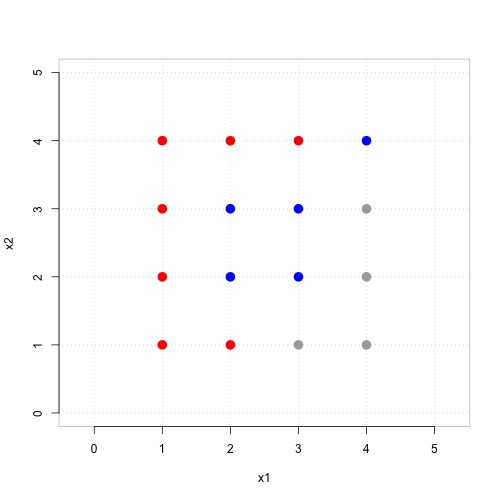

In [ ]:
def oneR_fit(df, var, target):
    # df: pandas DataFrame
    # var: nombre de la columna para construir el clasificador
    # target: columna con las clases

    ## crea una copia para no modificar el df original
    df0 = df.copy()

    ## Columna para contar la cantidad de ocurrencias del target
    df0["counter"] = 0

    ## conteo
    df0 = df0.groupby([var, target], as_index=False).count()[[var, target, "counter"]]

    ## genera un vector con el maximo conteo por cada valor de var
    df0_max_counter = df0.groupby([var], as_index=False).transform(max)

    ## vector de T/F indicando si la fila contiene el valor maximo del conteo
    df0_idx = df0["counter"] == df0_max_counter["counter"]

    ## Seleccionar var y target para los maximos
    df0 = df0.loc[df0_idx, [var, target]]

    ## obtiene solo la primera fila si varias clases
    ## tiene la misma frecuencia maxima
    df0 = df0.groupby(var, as_index=False).first()

    ## convierte var en el indice de la tabla
    df0 = df0.set_index(var)

    return df0# , df0_max_counter, df0_idx

In [ ]:
## reglas para x1
rules_x1 = oneR_fit(df, "x1", "y")
rules_x1

In [ ]:
## reglas para x2
rules_x2 = oneR_fit(df, "x2", "y")
rules_x2

In [ ]:
## reglas para x3
rules_x3 = oneR_fit(df, "x3", "y")
rules_x3

### Predicción

In [ ]:
def oneR_predict(df, rules):
    ## genera una copia del DataFrame
    df0 = df.copy()

    ## convierte la variable usada para construir las reglas
    ## en el indice de las filas del dataframe
    df0 = df0.set_index(rules.index.name, drop=False)

    ## hace un left join con base en los valores de los
    ## indices de las filas del df y rules
    df0 = df0.join(rules, rsuffix="_predicted_" + rules.index.name)
    df0.index = range(len(df0))

    return df0

In [ ]:
df0 = df.copy()
df0 = oneR_predict(df0, rules_x1)  ## Pronostico usando x1
df0 = oneR_predict(df0, rules_x2)  ## Pronostico usando x2
df0 = oneR_predict(df0, rules_x3)  ## Pronostico usando x3
df0

### Precisión

In [ ]:
## cantidad de aciertos
print("x1 : ", (df0.y == df0.y_predicted_x1).sum())
print("x2 : ", (df0.y == df0.y_predicted_x2).sum())
print("x3 : ", (df0.y == df0.y_predicted_x3).sum())

### Matriz de confusión

In [ ]:
confusion_matrix(df0.y, df0.y_predicted_x1)

In [ ]:
confusion_matrix(df0.y, df0.y_predicted_x2)

In [ ]:
confusion_matrix(df0.y, df0.y_predicted_x3)

In [ ]:
print('ok_')